In [9]:
import numpy as np
import os, sys
from sklearn.model_selection import train_test_split
from sklearn import metrics

import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras import Input
from keras.layers import Rescaling
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

### **Cargar Base de Datos**

In [3]:
!git clone https: // github.com / luismateoh / fruit-feature-extractor.git

%cd '/content/fruit-feature-extractor/vector_data/'}

rutaPath = '/content/fruit-feature-extractor/vector_data/'

Cloning into 'fruit-feature-extractor'...
remote: Enumerating objects: 350, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 350 (delta 0), reused 4 (delta 0), pack-reused 346
Receiving objects: 100% (350/350), 166.12 MiB | 25.61 MiB/s, done.
[Errno 2] No such file or directory: '/content/fruit-feature-extractor/vector_data/}'
/content


In [24]:
x = np.load(rutaPath + 'vector_training.npy')
print(x.shape)

y = np.load(rutaPath + 'vector_y.npy')
y = to_categorical(y, num_classes=4)
print(y.shape)

(333, 1764)
(333, 4)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(233, 1764)
(100, 1764)
(233, 4)
(100, 4)


In [17]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Rescaling, Dropout, BatchNormalization

model = Sequential()
model._name="LeNet-5"
# Input
model.add(Input(shape=(1764,)))
# Rescaling
#model.add(Rescaling(1.0 / 255))
# Layer 1
model.add(Dense(units=32, activation='relu'))
# Layer 2
model.add(Dense(units=64, activation='relu'))
# Layer Dropout
model.add(Dropout(0.5))
# Layer 3
model.add(Dense(units=128, activation='relu'))
# Output Layer
model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "LeNet-5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                56480     
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 4)                 516       
                                                                 
Total params: 67,428
Trainable params: 67,428
Non-trainable params: 0
_________________________________________________________________


In [26]:
model = Sequential()
model._name="Improved_Model"

# Input
model.add(Input(shape=(1764,)))

# Normalize input values
model.add(BatchNormalization())

# Layer 1
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.3))

# Layer 2
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

# Layer 3
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.3))

# Layer 4
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "Improved_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 1764)             7056      
 hNormalization)                                                 
                                                                 
 dense_18 (Dense)            (None, 64)                112960    
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 256)               33024     
                                                    

In [27]:
#model.fit(x_train, y_train_categorical, epochs=1000, batch_size=200, validation_data=(x_test, y_test_categorical))
epochs = 100

callbacks = [
keras.callbacks.ModelCheckpoint(model.name + "_{epoch}.h5", save_freq=100)
]

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train,
y_train,
epochs = epochs,
callbacks = callbacks,
batch_size = 32,
validation_data = (x_test, y_test))

Epoch 1/100
8/8 [==============================] - 3s 45ms/step - loss: 1.3260 - accuracy: 0.3820 - val_loss: 1.2797 - val_accuracy: 0.4800
Epoch 2/100
8/8 [==============================] - 0s 14ms/step - loss: 1.0664 - accuracy: 0.5536 - val_loss: 1.2219 - val_accuracy: 0.6700
Epoch 3/100
8/8 [==============================] - 0s 15ms/step - loss: 0.8364 - accuracy: 0.7039 - val_loss: 1.0842 - val_accuracy: 0.6200
Epoch 4/100
8/8 [==============================] - 0s 17ms/step - loss: 0.5344 - accuracy: 0.7554 - val_loss: 1.0433 - val_accuracy: 0.6700
Epoch 5/100
8/8 [==============================] - 0s 13ms/step - loss: 0.4424 - accuracy: 0.8326 - val_loss: 0.9695 - val_accuracy: 0.7100
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 0.3348 - accuracy: 0.8670 - val_loss: 0.8639 - val_accuracy: 0.7600
Epoch 7/100
8/8 [==============================] - 0s 14ms/step - loss: 0.2780 - accuracy: 0.8970 - val_loss: 0.8267 - val_accuracy: 0.7200
Epoch 8/100
8/8 [===

## Metricas

$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

Donde:

TP = Verdaderos positivos (True Positives)

TN = Verdaderos negativos (True Negatives)

FP = Falsos positivos (False Positives)

FN = Falsos negativos (False Negatives)

El accuracy se calcula sumando el número de verdaderos positivos y verdaderos negativos, y dividiéndolo por el total de predicciones realizadas.

Verdaderos positivos (TP): son los casos en los que el modelo predijo correctamente que la muestra pertenece a la clase positiva.

Verdaderos negativos (TN): son los casos en los que el modelo predijo correctamente que la muestra pertenece a la clase negativa. 

Falsos positivos (FP): son los casos en los que el modelo predijo incorrectamente que la muestra pertenece a la clase positiva, cuando en realidad pertenece a la clase negativa. 

Falsos negativos (FN): son los casos en los que el modelo predijo incorrectamente que la muestra pertenece a la clase negativa, cuando en realidad pertenece a la clase positiva.

$Precision = \frac{TP}{TP + FP}$

La precisión mide la proporción de verdaderos positivos (TP) entre todas las predicciones positivas (TP y FP), es decir, mide la habilidad del modelo para clasificar correctamente 

$Recall = \frac{TP}{TP + FN}$

El recall mide la proporción de verdaderos positivos (TP) entre todas las muestras que pertenecen a la clase positiva (TP y FN), es decir, mide la habilidad del modelo para encontrar todas las muestras de la clase positiva.


Matriz de Confusión (Confusion Matrix): La matriz de confusión es una tabla que resume el rendimiento del modelo en términos de los cuatro posibles resultados: TP, TN, FP y FN.

||Clase positiva|Clase negativa|
|-|-|-|
|Pred. pos.|TP|FP|		
|Pred. neg.|FN|TN|

$F_{\beta} = (1 + \beta^{2}) \cdot \frac{precision \cdot recall}{\beta^{2} \cdot precision + recall}$

La medida F-Score combina la precisión y el recall en una sola métrica, y es útil cuando ambas métricas son importantes. 

Donde $\beta$ es un parámetro que controla el peso relativo de la precisión y el recall en la medida F-Score. Cuando $\beta = 1$, la medida F-Score se llama F1-Score y es la media armónica de la precisión y el recall.




4/4 [==============================] - 0s 5ms/step


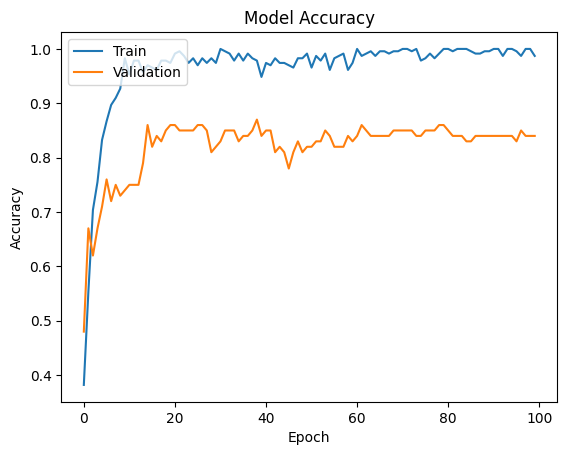

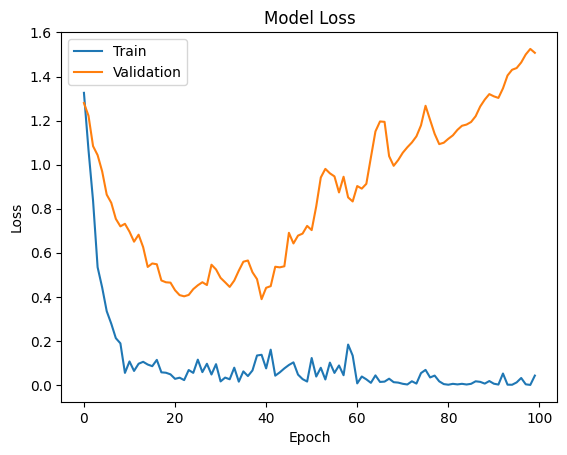

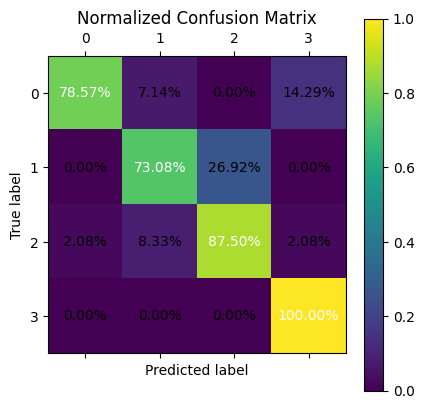

Accuracy: 0.84
F1 Score:               precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.79      0.73      0.76        26
           2       0.86      0.88      0.87        48
           3       0.80      1.00      0.89        12

    accuracy                           0.84       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.84      0.84      0.84       100



In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
accuracy = np.sum(y_pred_classes == y_true_classes) / len(y_true_classes)
f1_score = classification_report(y_true_classes, y_pred_classes)

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Compute normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot normalized confusion matrix with percentages
plt.matshow(cm_normalized)
plt.title('Normalized Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')

for i in range(cm_normalized.shape[0]):
    for
j in range(cm_normalized.shape[1]):
plt.text(j, i, "{:.2f}%".format(cm_normalized[i, j] * 100),
ha = "center", va = "center",
color = "white" if cm_normalized[i, j] > 0.5 else "black")

plt.show()

print('Accuracy:', accuracy)
print('F1 Score:', f1_score)


In [13]:
from sklearn.metrics import confusion_matrix

# make predictions on the test set
y_pred = model.predict(x_test)

# convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

print(y_test[0:3])
print(y_test_categorical[0:3])

print(y_pred[0:3])
print(y_pred_classes[0:3])
# calculate the confusion matrix
#conf_matrix = confusion_matrix(y_true, y_pred_classes)

# print the confusion matrix
#print(conf_matrix)

4/4 [==============================] - 0s 3ms/step
[0 2 2]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
[[9.99999285e-01 5.49589743e-07 6.35383870e-08 1.13863585e-07]
 [4.49948107e-10 3.13946416e-08 9.99999881e-01 7.27624538e-08]
 [2.16330445e-05 1.13682363e-04 9.99852657e-01 1.19807301e-05]]
[0 2 2]
